In [2]:
import pandas as pd

In [3]:
titanic_df = pd.read_csv("../data/titanic.csv")
titanic_df.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
667,1,2,Mrs. Thomas William Solomon (Elizabeth Catheri...,female,40.0,1,1,39.0000
420,0,3,Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)...,female,28.0,1,1,14.4000
51,1,1,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292
153,0,3,Mr. Ole Martin Olsen,male,27.0,0,0,7.3125
438,0,3,Mr. Leon Hampe,male,20.0,0,0,9.5000


In [4]:
titanic_df.shape

(887, 8)

<Axes: ylabel='count'>

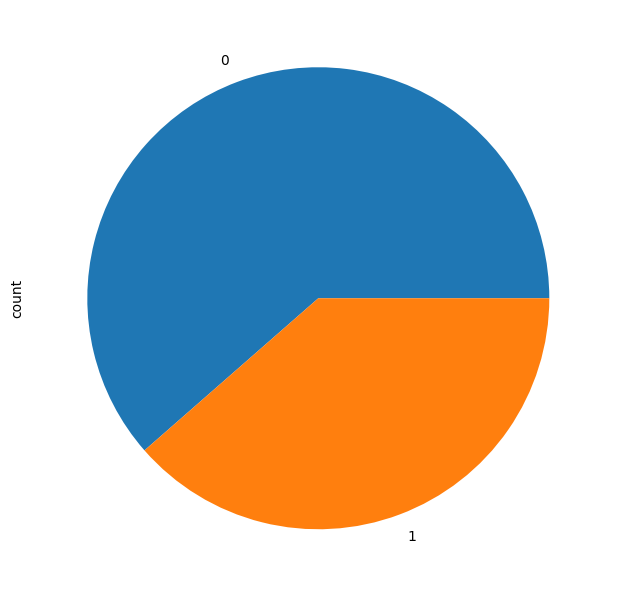

In [5]:
titanic_df["Survived"].value_counts() \
    .plot \
    .pie(figsize=(10, 7.5))

In [5]:
titanic_df.drop(columns=["Name", "Sex"]).corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [6]:
titanic_df.groupby(["Pclass", "Survived"]) \
    .count()

Name  Sex  Age  Siblings/Spouses Aboard  \
Pclass Survived                                            
1      0           80   80   80                       80   
       1          136  136  136                      136   
2      0           97   97   97                       97   
       1           87   87   87                       87   
3      0          368  368  368                      368   
       1          119  119  119                      119   

                 Parents/Children Aboard  Fare  
Pclass Survived                                 
1      0                              80    80  
       1                             136   136  
2      0                              97    97  
       1                              87    87  
3      0                             368   368  
       1                             119   119

<Axes: xlabel='Fare', ylabel='Age'>

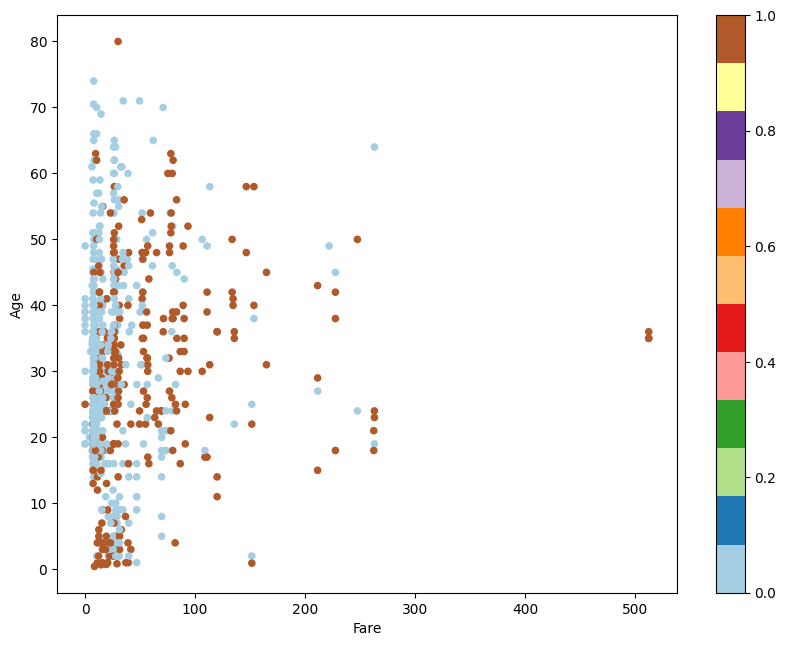

In [7]:
titanic_df.plot.scatter(x="Fare", y="Age", c=titanic_df["Survived"], cmap="Paired", figsize=(10, 7.5))

### Ekstrakcja cech z danych tekstowych
Zbiór Titanic zawiera informację o imieniu i nazwisku każdego pasażera, ale także o tytule jakim się posługiwał.

In [8]:
titanic_df["Name"].unique()

array(['Mr. Owen Harris Braund',
       'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
       'Miss. Laina Heikkinen',
       'Mrs. Jacques Heath (Lily May Peel) Futrelle',
       'Mr. William Henry Allen', 'Mr. James Moran',
       'Mr. Timothy J McCarthy', 'Master. Gosta Leonard Palsson',
       'Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson',
       'Mrs. Nicholas (Adele Achem) Nasser',
       'Miss. Marguerite Rut Sandstrom', 'Miss. Elizabeth Bonnell',
       'Mr. William Henry Saundercock', 'Mr. Anders Johan Andersson',
       'Miss. Hulda Amanda Adolfina Vestrom',
       'Mrs. (Mary D Kingcome) Hewlett', 'Master. Eugene Rice',
       'Mr. Charles Eugene Williams',
       'Mrs. Julius (Emelia Maria Vandemoortele) Vander Planke',
       'Mrs. Fatima Masselmani', 'Mr. Joseph J Fynney',
       'Mr. Lawrence Beesley', 'Miss. Anna McGowan',
       'Mr. William Thompson Sloper', 'Miss. Torborg Danira Palsson',
       'Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Asplund',


In [9]:
import numpy as np

In [10]:
titanic_df["Name"].str.split()

0                            [Mr., Owen, Harris, Braund]
1      [Mrs., John, Bradley, (Florence, Briggs, Thaye...
2                              [Miss., Laina, Heikkinen]
3      [Mrs., Jacques, Heath, (Lily, May, Peel), Futr...
4                           [Mr., William, Henry, Allen]
                             ...                        
882                             [Rev., Juozas, Montvila]
883                     [Miss., Margaret, Edith, Graham]
884                  [Miss., Catherine, Helen, Johnston]
885                            [Mr., Karl, Howell, Behr]
886                               [Mr., Patrick, Dooley]
Name: Name, Length: 887, dtype: object

In [11]:
titanic_df["Name"].str.split().explode()

0          Mr.
0         Owen
0       Harris
0       Braund
1         Mrs.
        ...   
885     Howell
885       Behr
886        Mr.
886    Patrick
886     Dooley
Name: Name, Length: 3536, dtype: object

In [12]:
phrase_counts = titanic_df["Name"].str.split().explode().value_counts().sort_values(ascending=False)
phrase_counts

Name
Mr.        513
Miss.      182
Mrs.       125
William     62
John        44
          ... 
Carlo        1
David)       1
Adola        1
Asim         1
Aurora       1
Name: count, Length: 1580, dtype: int64

In [13]:
phrase_counts[phrase_counts.index.str.endswith(".")]

Name
Mr.          513
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Sir.           1
L.             1
Lady.          1
Jonkheer.      1
Countess.      1
Capt.          1
Ms.            1
Mme.           1
Name: count, dtype: int64

In [14]:
phrase_counts[phrase_counts.index.str.endswith(".") & (phrase_counts > 2)]

Name
Mr.        513
Miss.      182
Mrs.       125
Master.     40
Dr.          7
Rev.         6
Name: count, dtype: int64

In [15]:
titles = phrase_counts[phrase_counts.index.str.endswith(".") & (phrase_counts > 2)].index

In [16]:
titles

Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.'], dtype='object', name='Name')

In [17]:
for title in titles:
    titanic_df[title] = titanic_df["Name"].str.contains(title, regex=False)

In [18]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,True,False,False,False,False,False
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,False,False,True,False,False,False
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,False,True,False,False,False,False
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,False,False,True,False,False,False
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,False,False,False,False,False,True
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,False,True,False,False,False,False
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,False,True,False,False,False,False
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,True,False,False,False,False,False


### Liczba imion pasażera
Patrząc na zróżnicowanie liczby imion pomiędzy poszczególnymi pasażerami, wartym uwagi wydaje się być dodanie tej informacji do zbioru.

In [19]:
titanic_df["Names_count"] = titanic_df["Name"].str.split().apply(len)

In [20]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,True,False,False,False,False,False,4
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,False,False,True,False,False,False,7
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,False,True,False,False,False,False,3
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,False,False,True,False,False,False,7
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,True,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,False,False,False,False,False,True,3
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,False,True,False,False,False,False,4
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,False,True,False,False,False,False,4
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,True,False,False,False,False,False,4


In [22]:
titanic_df.drop(columns=["Name", "Sex"]).corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Mr.,Miss.,Mrs.,Master.,Dr.,Rev.,Names_count
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.547835,0.325936,0.338202,0.084577,0.007880,-0.065374,0.231356
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.139969,0.001317,-0.147985,0.083027,-0.108773,-0.030153,-0.217556
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.196475,-0.269164,0.180689,-0.382306,0.082781,0.080077,0.095078
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.249202,0.086942,0.062597,0.349309,0.003721,-0.026812,0.158352
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.332799,0.104599,0.225185,0.267044,-0.042363,-0.022155,0.227005
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.182416,0.117362,0.104468,0.010473,0.030228,-0.023210,0.169528
Mr.,-0.547835,0.139969,0.196475,-0.249202,-0.332799,-0.182416,1.000000,-0.595064,-0.474352,-0.254514,-0.104455,-0.096652,-0.333101
Miss.,0.325936,0.001317,-0.269164,0.086942,0.104599,0.117362,-0.595064,1.000000,-0.205787,-0.110415,-0.045316,-0.041930,-0.173706
Mrs.,0.338202,-0.147985,0.180689,0.062597,0.225185,0.104468,-0.474352,-0.205787,1.000000,-0.088017,-0.036123,-0.033425,0.686235
Master.,0.084577,0.083027,-0.382306,0.349309,0.267044,0.010473,-0.254514,-0.110415,-0.088017,1.000000,-0.019382,-0.017934,-0.016814


In [23]:
titanic_df.to_parquet("../data/titanic-preprocessed.parquet")